In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import random
import time  
import os
import imageio


In [2]:
data = np.loadtxt("pandemic.csv", dtype = str, delimiter = ",")
numInfected = np.loadtxt("count.csv", dtype = str, delimiter = ",")
numInfected = np.array(numInfected , dtype = int)

In [3]:
allAgents = []
n = 1000
for i in range(0,int(len(data)/n)):
    allAgents.append(data[i*n:(i+1)*n])
    

In [4]:
xs = []
ys = []
infecteds = []
for step in allAgents:
    try:
      x = []
      y = []
      infected = []

      for agent in step:
        x.append(float(agent[0]))
        y.append(float(agent[1]))
        if agent[2] == "false":
            infected.append(False)
        else:
            infected.append(True)
      xs.append(x)
      ys.append(y)
      infecteds.append(infected)
    except:
        pass


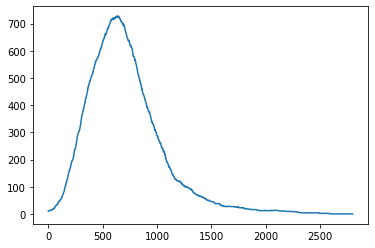

In [5]:
t = np.arange(0,len(numInfected),1)
plt.plot(t,numInfected)

!mkdir frames
filenames = []
fig, ax = plt.subplots(figsize=(12,6))

for i in range(0,len(allAgents),10):
    fig.suptitle("100% Masks, 0% Vaccines")
    plt.subplot(1,2,1)
    plt.scatter(xs[i],ys[i],s = 8,c = infecteds[i], cmap = "RdYlGn_r")
    plt.xlim(-1000,3000)
    plt.ylim(-1000,3000)
    plt.subplot(1,2,2)
    t = np.arange(0,i,1)
    plt.plot(t,numInfected[0:i])
    plt.ylabel("Number Infected")
    plt.xlabel("Time")
    plt.tight_layout()
    ## Animation part (doesn't change)
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    plt.savefig("frames/"+f'{i}.png', dpi = 200)
    filenames.append(f'{i}.png')
    fig.clear()             # Prevent overlapping and layered plots
    # Sleep for half a second to slow down the animation
plt.show()

# build gif
with imageio.get_writer('MaskNoVaccine.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread("frames/" + filename)
        writer.append_data(image)
        